In [10]:
import numpy as np
import pyscipopt 
import matplotlib.pyplot as plt
import pickle as pkl
import sys
import os

from bluff_lp.utils import convert_buffer_to_strategies
from bluff_lp.constants import NUM_FACES, NUM_DICES
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Expected reward matrix

In [11]:
# A_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],
#                 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0]]) 

# A_2 = np.array([[0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# A_1 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1],
#                 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, -1, 0, 1, 0, 0, 0, 0, 0, 0]]) # Adding null path 

# A_2 = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, -1, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#                 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
# zeros_ = np.zeros_like(A_1)
# A_1_extended = np.concatenate((A_1, zeros_))
# A_2_extended = np.concatenate((zeros_, A_2))
# A = 1 /2 * np.concatenate((A_1_extended, A_2_extended), axis=1).T
# A_r = A_1.T
A = np.load(f"bluff_lp/game_matrices/{NUM_DICES}_{NUM_FACES}f/({1},)_{NUM_FACES}.npy")

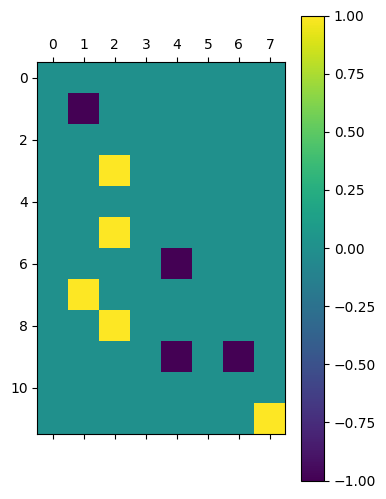

In [13]:
plt.matshow(A)
plt.colorbar()

In [15]:
np.sum(A)

1.0

In [16]:
A_ = A[1:, 1:]

In [17]:
A_[:,0]

array([-1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
A_[:, 3]

array([ 0.,  0.,  0.,  0.,  0., -1.,  0.,  0., -1.,  0.,  0.])

In [19]:
A.shape

(12, 8)

## Buffers

In [20]:
with open(f"bluff_lp/buffers/1_{NUM_FACES}f/x_buffer.pkl", "rb") as f:
    x_buffer = pkl.load(f)
with open(f"bluff_lp/buffers/1_{NUM_FACES}f/y_buffer.pkl", "rb") as f:
    y_buffer = pkl.load(f)

In [21]:
x_strategies, y_startegies = convert_buffer_to_strategies(
    num_dices=NUM_DICES, num_faces=NUM_FACES)

In [22]:
x_strategies

{1: [(2, 2)],
 2: [(2, 1)],
 3: [(2, 1), 'Bluff'],
 4: [(1, 2)],
 5: [(1, 2), 'Bluff'],
 6: [(1, 2), (2, 2)],
 7: [(1, 1)],
 8: [(1, 1), 'Bluff'],
 9: [(1, 1), (2, 2)],
 10: [(1, 1), (2, 1)],
 11: [(1, 1), (2, 1), 'Bluff']}

In [23]:
y_startegies

{1: ['Bluff'],
 2: [(2, 2)],
 3: [(2, 1)],
 4: [(2, 1), 'Bluff'],
 5: [(1, 2)],
 6: [(1, 2), 'Bluff'],
 7: [(1, 2), (2, 2)]}

In [24]:
x_ @ A_ @ y_

NameError: name 'x_' is not defined

In [25]:
row_impostor = np.zeros_like(x_)
row_impostor[-1] = 1
row_impostor @ A_ @ y_

NameError: name 'x_' is not defined

## Constraints

In [26]:
E = np.load(F"bluff_lp/game_constraints/1_{NUM_FACES}f/x.npy")
F = np.load(F"bluff_lp/game_constraints/1_{NUM_FACES}f/y.npy")

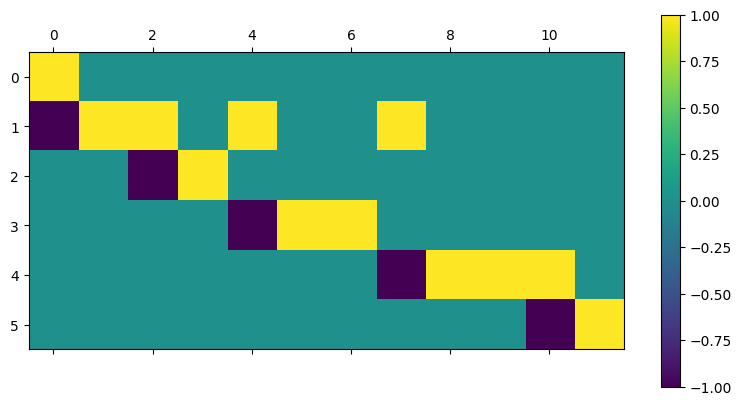

In [27]:
plt.matshow(E)
plt.colorbar()

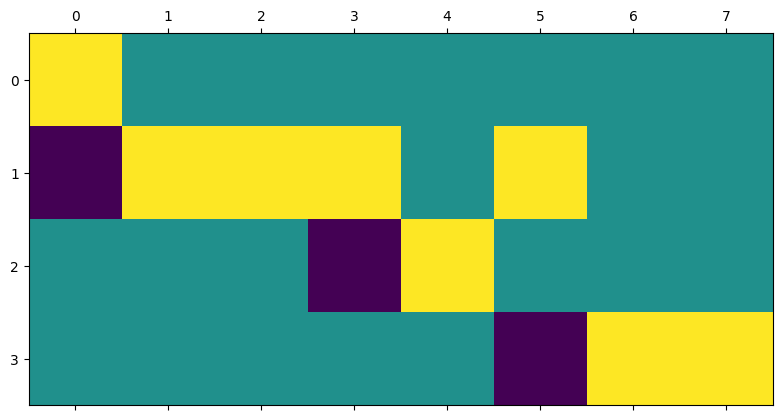

In [28]:
plt.matshow(F)

# Network flow constraints

In [24]:
# E = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#               [-1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
#               [0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#               [0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#               [0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
#               [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0]])

# # E = np.array([[0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
# #               [1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
# #               [0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
# #               [0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0]])
k, m = E.shape

e = np.zeros((k, 1))
e[0] = 1.0
# e = np.array([[0], [0], [0], [0],]) 

# zeros_e = np.zeros_like(E)
# E_ext_1 = np.concatenate((E, zeros_e))
# E_ext_2 = np.concatenate((zeros_e, E))
# E = np.concatenate((E_ext_1, E_ext_2), axis=1)

# e = np.concatenate((e, e))

In [29]:
A_ = A[1:, 1:]
x = np.load(f"bluff_lp/solutions/{NUM_DICES}_{NUM_FACES}/strategy_{1}_{NUM_FACES}.npy")
y = np.load(f"bluff_lp/solutions/{NUM_DICES}_{NUM_FACES}/strategy_{1}_{NUM_FACES}_dual.npy")

In [30]:
x_, y_ = x[1:], y[1:]

In [55]:
y_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0.])

In [56]:
x_ @ A_ @ y_

0.3333333333333333

In [32]:
y_startegies

{1: ['Bluff'],
 2: [(2, 3)],
 3: [(2, 2)],
 4: [(2, 2), 'Bluff'],
 5: [(2, 1)],
 6: [(2, 1), 'Bluff'],
 7: [(2, 1), (2, 3)],
 8: [(1, 3)],
 9: [(1, 3), 'Bluff'],
 10: [(1, 3), (2, 3)],
 11: [(1, 3), (2, 2)],
 12: [(1, 3), (2, 2), 'Bluff'],
 13: [(1, 2)],
 14: [(1, 2), 'Bluff'],
 15: [(1, 2), (2, 3)],
 16: [(1, 2), (2, 2)],
 17: [(1, 2), (2, 2), 'Bluff'],
 18: [(1, 2), (2, 1)],
 19: [(1, 2), (2, 1), 'Bluff'],
 20: [(1, 2), (2, 1), (2, 3)]}

In [33]:
x_strategies

{1: [(2, 3)],
 2: [(2, 2)],
 3: [(2, 2), 'Bluff'],
 4: [(2, 1)],
 5: [(2, 1), 'Bluff'],
 6: [(2, 1), (2, 3)],
 7: [(1, 3)],
 8: [(1, 3), 'Bluff'],
 9: [(1, 3), (2, 3)],
 10: [(1, 3), (2, 2)],
 11: [(1, 3), (2, 2), 'Bluff'],
 12: [(1, 2)],
 13: [(1, 2), 'Bluff'],
 14: [(1, 2), (2, 3)],
 15: [(1, 2), (2, 2)],
 16: [(1, 2), (2, 2), 'Bluff'],
 17: [(1, 2), (2, 1)],
 18: [(1, 2), (2, 1), 'Bluff'],
 19: [(1, 2), (2, 1), (2, 3)],
 20: [(1, 1)],
 21: [(1, 1), 'Bluff'],
 22: [(1, 1), (2, 3)],
 23: [(1, 1), (2, 2)],
 24: [(1, 1), (2, 2), 'Bluff'],
 25: [(1, 1), (2, 1)],
 26: [(1, 1), (2, 1), 'Bluff'],
 27: [(1, 1), (2, 1), (2, 3)],
 28: [(1, 1), (1, 3)],
 29: [(1, 1), (1, 3), 'Bluff'],
 30: [(1, 1), (1, 3), (2, 3)],
 31: [(1, 1), (1, 3), (2, 2)],
 32: [(1, 1), (1, 3), (2, 2), 'Bluff']}

In [34]:
len(x_)

32

In [35]:
print(E.shape)

(14, 33)


In [36]:
# F = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
#               [-1, 1, 1, 1, 1, 0, 0, 0],
#               [0, -1, 0, 0, 0, 1, 1, 0], 
#               [0, 0, -1, 0, 0, 0, 0, 1]])
# # F = np.array([[-1, 0, 0, 0, 1, 1, 0], 
# #               [0, -1, 0, 0, 0, 0, 1]])
o, n = F.shape

# f = np.array([[0], [0]])
# f = np.array([[1], [0], [0], [0]])
f = np.zeros((o, 1))
f[0] = 1.0 

# zeros_f = np.zeros_like(F)
# F_ext_1 = np.concatenate((F, zeros_f))
# F_ext_2 = np.concatenate((zeros_f, F))
# F = np.concatenate((F_ext_1, F_ext_2), axis=1)

# f = np.concatenate((f, f))

In [37]:
F.shape

(9, 21)

In [38]:
# E = np.array([
#             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0 ,0, 0 ,0 ,0, 0, 0, 0, 0, 1, 1, 1, 1],
#             [0, -1, 0, 0, 0, 0, 0, 0, 1, 1 , 1, 1 ,0, 0 ,0 ,0, 0, 0, 0, 0, 0, 0, 0, 0],
#             [0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#             [0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, -1, 0, 0, 0],
#             [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, -1, 0, 0], 
#             [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, -1, 0],
#             ])
# _, m = E.shape

# e = np.array([[1], [1], [0], [0], [0], [0], [0], [0]]) / 2

In [39]:
# F = np.array([
#             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [-1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 
#             [0, -1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0], 
#             [0, 0, -1, 0, 0, 0, 1, 1, 0, -1, 0, 0, 0, 1, 1, 0], 
#             [0, 0, 0, -1, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0, 1],
#             ])
# _, n = F.shape

# f = np.array([[1], [1], [0], [0], [0], [0]]) / 2

# Building the model

## Variables

In [40]:
lp = pyscipopt.Model()
x = {i: lp.addVar(f"x[{i}]", vtype="C", lb=0.0, ub=1.0) for i in range(m)}
q = {k: lp.addVar(f"q[{k}]", vtype="C", lb=-lp.infinity(), ub=lp.infinity()) for k in range(f.shape[0])}

## Objective

In [41]:
lp.setObjective(-pyscipopt.quicksum(e[k, 0] * q[k] for k in range(f.shape[0])))
lp.setMaximize()

## Constraints

In [42]:
for i in range(n):
    lp.addCons(pyscipopt.quicksum(-A[j, i] * x[j] for j in range(m)) -
               pyscipopt.quicksum(F[k, i] * q[k] for k in range(f.shape[0])) <= 0)

for i in range(E.shape[0]):
    lp.addCons(pyscipopt.quicksum(E.T[j, i] * x[j] for j in range(m)) == e[i, 0])

## Optimization

In [43]:
lp.optimize()

presolving:
(round 1, fast)       9 del vars, 13 del conss, 0 add conss, 9 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       11 del vars, 15 del conss, 0 add conss, 12 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 3, fast)       11 del vars, 15 del conss, 0 add conss, 13 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 4, fast)       11 del vars, 15 del conss, 0 add conss, 15 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 5, fast)       11 del vars, 15 del conss, 0 add conss, 16 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 6, fast)       12 del vars, 16 del conss, 0 add conss, 16 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 7, exhaustive) 12 del vars, 17 del conss, 0 add conss, 16 chg bounds, 1 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 8, exhaustive) 24 del vars, 17 del conss, 0 a

# Results

In [44]:
{i: lp.getVal(x[i]) for i in range(m)}

{0: 1.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 1.0,
 21: 1.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0,
 30: 0.0,
 31: 0.0,
 32: 0.0}

In [45]:
x_strategies

{1: [(2, 3)],
 2: [(2, 2)],
 3: [(2, 2), 'Bluff'],
 4: [(2, 1)],
 5: [(2, 1), 'Bluff'],
 6: [(2, 1), (2, 3)],
 7: [(1, 3)],
 8: [(1, 3), 'Bluff'],
 9: [(1, 3), (2, 3)],
 10: [(1, 3), (2, 2)],
 11: [(1, 3), (2, 2), 'Bluff'],
 12: [(1, 2)],
 13: [(1, 2), 'Bluff'],
 14: [(1, 2), (2, 3)],
 15: [(1, 2), (2, 2)],
 16: [(1, 2), (2, 2), 'Bluff'],
 17: [(1, 2), (2, 1)],
 18: [(1, 2), (2, 1), 'Bluff'],
 19: [(1, 2), (2, 1), (2, 3)],
 20: [(1, 1)],
 21: [(1, 1), 'Bluff'],
 22: [(1, 1), (2, 3)],
 23: [(1, 1), (2, 2)],
 24: [(1, 1), (2, 2), 'Bluff'],
 25: [(1, 1), (2, 1)],
 26: [(1, 1), (2, 1), 'Bluff'],
 27: [(1, 1), (2, 1), (2, 3)],
 28: [(1, 1), (1, 3)],
 29: [(1, 1), (1, 3), 'Bluff'],
 30: [(1, 1), (1, 3), (2, 3)],
 31: [(1, 1), (1, 3), (2, 2)],
 32: [(1, 1), (1, 3), (2, 2), 'Bluff']}

In [46]:
strategy = np.array([lp.getVal(x[i]) for i in range(m)])

# Dual problem

## Variables

In [47]:
lp = pyscipopt.Model()
y = {i: lp.addVar(f"y[{i}]", vtype="C", lb=0.0, ub=1.0) for i in range(n)}
p = {k: lp.addVar(f"p[{k}]", vtype="C", lb=-lp.infinity(), ub=lp.infinity()) for k in range(e.shape[0])}

## Objective

In [48]:
lp.setObjective(pyscipopt.quicksum(e[k, 0] * p[k] for k in range(e.shape[0])))
lp.setMinimize()

## Constraints

In [49]:
for i in range(m):
    lp.addCons(pyscipopt.quicksum(-A[i, j] * y[j] for j in range(n)) +
               pyscipopt.quicksum(E[k, i] * p[k] for k in range(e.shape[0])) >= 0)

for i in range(F.shape[0]):
    lp.addCons(pyscipopt.quicksum(F[i, j] * y[j] for j in range(n)) == f[i, 0])

## Optimization

In [50]:
lp.optimize()

presolving:
(round 1, fast)       9 del vars, 16 del conss, 0 add conss, 14 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 2, fast)       12 del vars, 19 del conss, 0 add conss, 17 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 3, fast)       12 del vars, 20 del conss, 0 add conss, 18 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 4, fast)       12 del vars, 20 del conss, 0 add conss, 21 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 5, fast)       12 del vars, 20 del conss, 0 add conss, 22 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 6, fast)       12 del vars, 20 del conss, 0 add conss, 23 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 7, fast)       13 del vars, 21 del conss, 0 add conss, 23 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
(round 8, exhaustive) 13 del vars, 22 del conss, 0 

## Results

In [51]:
{i: lp.getVal(y[i]) for i in range(n)}

{0: 1.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 1.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 1.0,
 19: 1.0,
 20: 0.0}

In [52]:
y_startegies

{1: ['Bluff'],
 2: [(2, 3)],
 3: [(2, 2)],
 4: [(2, 2), 'Bluff'],
 5: [(2, 1)],
 6: [(2, 1), 'Bluff'],
 7: [(2, 1), (2, 3)],
 8: [(1, 3)],
 9: [(1, 3), 'Bluff'],
 10: [(1, 3), (2, 3)],
 11: [(1, 3), (2, 2)],
 12: [(1, 3), (2, 2), 'Bluff'],
 13: [(1, 2)],
 14: [(1, 2), 'Bluff'],
 15: [(1, 2), (2, 3)],
 16: [(1, 2), (2, 2)],
 17: [(1, 2), (2, 2), 'Bluff'],
 18: [(1, 2), (2, 1)],
 19: [(1, 2), (2, 1), 'Bluff'],
 20: [(1, 2), (2, 1), (2, 3)]}